In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import math

In [2]:
images=[]
path = "/home/arjun/Desktop/gmm/ENPM673-P3-Color-segmentation-using-Gaussian-Mixture-Models-and-Expectation-Maximization/Data/Orange /"
for image in os.listdir(path):
    images.append(image)

In [3]:
hitogram_b=np.zeros((256,1))
hitogram_g=np.zeros((256,1))
hitogram_r=np.zeros((256,1))

In [4]:
im=cv2.imread("%s%s"%(path,images[6]))

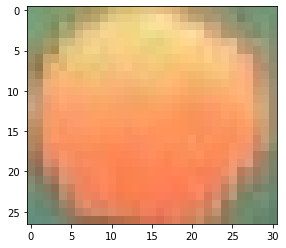

In [5]:
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

In [6]:
for image in images:
    img = cv2.imread("%s%s"%(path,image))
    color = ("b", "g", "r") 
    for i,col in enumerate(color):
        if col =='b':
            histr_b = cv2.calcHist([img],[i],None,[256],[0,256])
            hitogram_b=np.column_stack((hitogram_b,histr_b))

        if col =='g':
            histr_g = cv2.calcHist([img],[i],None,[256],[0,256])
            hitogram_g=np.column_stack((hitogram_g,histr_g))

        if col =='r':
            histr_r = cv2.calcHist([img],[i],None,[256],[0,256])
            hitogram_r=np.column_stack((hitogram_r,histr_r))


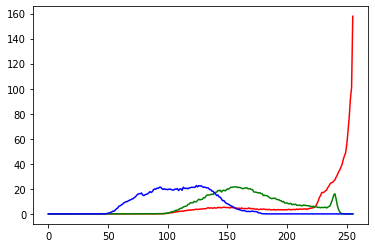

In [7]:
histogram_avg_r = np.sum(hitogram_r, axis=1) / (hitogram_r.shape[1]-1)
histogram_avg_g = np.sum(hitogram_g, axis=1) / (hitogram_g.shape[1]-1)
histogram_avg_b = np.sum(hitogram_b, axis=1) / (hitogram_b.shape[1]-1)

plt.plot(histogram_avg_r,color = 'r')
plt.plot(histogram_avg_g,color = 'g')
plt.plot(histogram_avg_b,color = 'b')
plt.show()


In [8]:
def Probabilty(x_co, mean, std):
    m=mean*np.ones((1,x_co.shape[0]))
    return (1 / (std * np.sqrt(2 * np.pi))) * (np.exp(-(np.square(x_co - m)) / (2 * (std) ** 2)))

## GREEN CHANNEL

In [9]:
pixel=[]
for image in images:
        image = cv2.imread("%s%s"%(path,image))
        image = image[:, :, 1]
        for i in np.ravel(image):
            pixel.append(i)

p=np.array(pixel)

n = 0
mean1 = 120
mean2 = 240


std1 = 10
std2 = 3

   

In [10]:
while (n != 80):
        p1 = Probabilty(p,mean1,std1)
        p2 = Probabilty(p, mean2, std2)
        
        D=p1+p2
        b1=p1/D
        b2=p2/D

        
        mean1=np.sum(b1*p)/(np.sum(b1))
        mean2=np.sum(b2*p)/(np.sum(b2))
        
        std1=np.sqrt(np.sum(b1*np.square(p-mean1))/np.sum(b1))
        std2=np.sqrt(np.sum(b2*np.square(p-mean2))/np.sum(b2))
        n = n + 1

In [11]:
print('final mean- ',mean1,mean2)
print('final strd- ',std1,std2)

final mean-  147.57477602256444 189.73819146809984
final strd-  20.590254247566076 31.16324923531824


## RED CHANNEL

In [12]:
n = 0
mean1 = 250
mean2 = 210
# mean3 = 190

std1 = 10
std2 = 5
# std3 = 10
pixel=[]
for image in images:
        image = cv2.imread("%s%s"%(path,image))
        image = image[:, :, 2]
        for i in np.ravel(image):
            pixel.append(i)

p=np.array(pixel)

In [13]:
while (n != 60):
        p1 = Probabilty(p,mean1,std1)
        p2 = Probabilty(p, mean2, std2)
#         p3 = Probabilty(p, mean3, std3)
        
        D=p1+ p2 
#         D=p1+ p2 
        b1=p1/D
        b2=p2/D
#         b3=p3/D
        
        mean1=np.sum(b1*p)/(np.sum(b1))
        mean2=np.sum(b2*p)/(np.sum(b2))
#         mean3=np.sum(b3*p)/(np.sum(b3))
        
        std1=np.sqrt(np.sum(b1*np.square(p-mean1))/np.sum(b1))
        std2=np.sqrt(np.sum(b2*np.square(p-mean2))/np.sum(b2))
#         std3=np.sqrt(np.sum(b3*np.square(p-mean3))/np.sum(b3))
        n = n + 1

In [14]:
print('final mean- ',mean1,mean2)
print('final strd- ',std1, std2)

final mean-  248.10449537635617 187.86435304345568
final strd-  6.3506138492694255 43.28053652821052


## BLUE CHANNEL

In [15]:
n = 0
mean1 = 120
mean2 = 150
# mean3 = 150

std1 = 10
std2 = 10
# std3 = 10
pixel=[]
for image in images:
        image = cv2.imread("%s%s"%(path,image))
        image = image[:, :, 0]
        for i in np.ravel(image):
            pixel.append(i)

p=np.array(pixel)

In [16]:
while (n != 100):
        p1 = Probabilty(p,mean1,std1)
        p2 = Probabilty(p, mean2, std2)
#         p3 = Probabilty(p, mean3, std3)
        
        D=p1+ p2 
#         D=p1+ p2 
        b1=p1/D
        b2=p2/D
#         b3=p3/D
        
        mean1=np.sum(b1*p)/(np.sum(b1))
        mean2=np.sum(b2*p)/(np.sum(b2))
#         mean3=np.sum(b3*p)/(np.sum(b3))
        
        std1=np.sqrt(np.sum(b1*np.square(p-mean1))/np.sum(b1))
        std2=np.sqrt(np.sum(b2*np.square(p-mean2))/np.sum(b2))
#         std3=np.sqrt(np.sum(b3*np.square(p-mean3))/np.sum(b3))
        n = n + 1

In [17]:
print('final mean- ',mean1,mean2)
print('final strd- ',std1, std2)

final mean-  88.59471957900057 129.06556795212748
final strd-  16.909108676216494 17.142150065394695


## GAUSSIAN PLOT

0.0235957229364933
0.023275369665854296
0.01937131097057515
0.012802545061002204
0.05039798036499546
0.010289505118678079


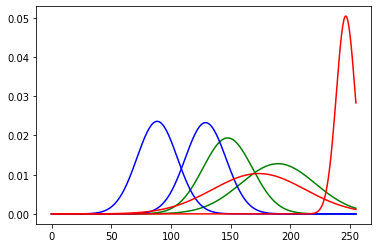

In [18]:
def gaussian(x, mu, sig):
    return ((1/(sig*math.sqrt(2*math.pi)))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))


x=list(range(0, 256))

mg1=np.array([147.57])
sg1=np.array([20.59])
mg2=np.array([189.73])
sg2=np.array([31.16])
# mg3=np.array([244.42])
# sg3=np.array([5.06])

g1=gaussian(x, mg1, sg1)
g2=gaussian(x, mg2, sg2)
# g3=gaussian(x, mg3, sg3)

plt.plot(g1, 'g')
plt.plot(g2, 'g')
# plt.plot(g3, 'g')
# print(max(g3))


mr1=np.array([246.5])
sr1=np.array([7.9])
mr2=np.array([173.63])
sr2=np.array([38.77])
# mr3=np.array([194.35])
# sr3=np.array([21.06])
r1=gaussian(x, mr1, sr1)
r2=gaussian(x, mr2, sr2)
# r3=gaussian(x, mr3, sr3)

mb1=np.array([88.5])
sb1=np.array([16.9])
mb2=np.array([129.06])
sb2=np.array([17.14])
# mb3=np.array([148.52])
# sb3=np.array([18.30])
b1=gaussian(x, mb1, sb1)
b2=gaussian(x, mb2, sb2)
# b3=gaussian(x, mb3, sb3)

plt.plot(b1, 'b')
plt.plot(b2, 'b')
# plt.plot(b3, 'b')

# print(max(r3))

plt.plot(r1, 'r')
plt.plot(r2, 'r')
# plt.plot(r3, 'r')
print(max(b1))
print(max(b2))

print(max(g1))
print(max(g2))

print(max(r1))
print(max(r2))
plt.show()


## TRIAL IMAGE SEGMENTATION

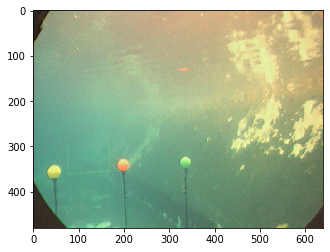

In [19]:
image=cv2.imread('frame.png')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))


In [49]:
image_b=image[:,:,0]
image_g=image[:,:,1]
image_r=image[:,:,2]
img_out3=np.zeros(image_r.shape, dtype = np.uint8)

for index, v in np.ndenumerate(image_r):
    
    if r1[v]>0.03 and (120<image_g[index]<220 )and image_b[index]<150:
                            img_out3[index]=255
    else:
                            img_out3[index]=0  
    


In [ ]:
x=list(range(0, 256))
mb1=np.array([170.1123])
sb1=np.array([36.1331436])
mg1=np.array([239.95395])
sg1=np.array([7.3541856])
mr1=np.array([252.3011604])
sr1=np.array([2.373163])


# In[4]:


ans_b1=gaussian(x, mb1, sb1)
ans_g1=gaussian(x, mg1, sg1)
ans_r1=gaussian(x, mr1, sr1)               
    
    if ans_r1[y]>0.15 and image_b[i][j]<150:
                    #print(ans_r[y], 'r')
                    img_out1[i][j]=255
                    
                if ans_g1[y]>0.02 and image_b[i][j]<150:
                    #print(ans_g[y], 'g')
                    img_out1[i][j]=0
                
                if ans_b1[y]>0.001 and image_b[i][j]<150:
                    #print(ans_b[y], 'b')
                    img_out1[i][j]=0

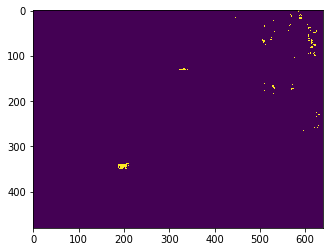

In [50]:
plt.imshow(img_out3)

In [53]:
ret, threshold3 = cv2.threshold(img_out3, 240, 255, cv2.THRESH_BINARY)
kernel3 = np.ones((3,3),np.uint8)
    
dilation3 = cv2.dilate(threshold3,kernel3,iterations =6)
contours3, _= cv2.findContours(dilation3, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
for contour in contours3:
            if cv2.contourArea(contour) >  20:
                (x,y),radius = cv2.minEnclosingCircle(contour)
#                 print(x)
#                 print(y)
#                 print(radius)
                center = (int(x),int(y))
                radius = int(radius)
                if 13<radius<22 :
                    cv2.circle(image,center,radius,(0,0,255),2)

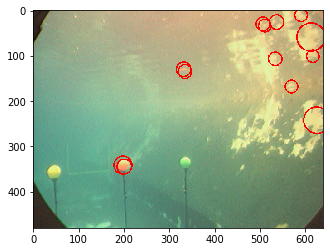

In [52]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))